In [4]:
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

In [1]:
#useful parameters
num_epochs = 10
batch_size = 20
lr=0.0002

In [6]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape, activation='relu'))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.4))
  #model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.4))
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(1,input_shape=(None,784), activation='sigmoid'))


  opt = Adam(lr=lr, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 12545     
                                                                 
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


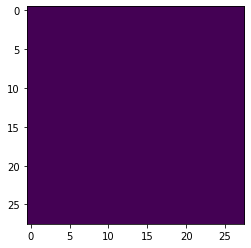

In [10]:
black = np.zeros(shape=(28,28,1))
white = np.ones(shape=(28,28,1))
#pyplot.imshow(np.resize(black,(28,28)))
model = define_discriminator()
model.build(input_shape = (28,28,1))
model.summary()


In [15]:
prediction = model.predict(np.array([black,white]))
model.fit(x = np.array([black,white]), y=np.array([0,1]),epochs = 200)
prediction = model.predict(np.array([black,white]))


1/1 [==============================] - 0s 22ms/step
Epoch 1/200
1/1 [==============================] - 0s 11ms/step - loss: 0.1654 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 0.1631 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 0.1609 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 0.1586 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 0.1564 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 0.1542 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 0.1521 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.1500 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 0.1478 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 

In [16]:
prediction

array([[0.03160866],
       [0.99975145]], dtype=float32)